In [164]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

categories = ['alt.atheism', 'soc.religion.christian',
               'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
pprint(list(twenty_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [165]:
pprint(twenty_train.filenames)

array([ 'C:\\Users\\Administrator\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102994',
       'C:\\Users\\Administrator\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861',
       'C:\\Users\\Administrator\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879',
       ...,
       'C:\\Users\\Administrator\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60695',
       'C:\\Users\\Administrator\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38319',
       'C:\\Users\\Administrator\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\104440'], 
      dtype='<U103')


In [166]:
pprint(twenty_train.target)

array([7, 4, 4, ..., 3, 1, 8])


In [167]:
len(twenty_train.data)

11314

In [168]:
len(twenty_train.filenames)

11314

In [169]:
print("\n".join(twenty_train.data[0].split("\n")[:30]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [170]:
print(twenty_train.target_names[twenty_train.target[0]])

rec.autos


In [171]:
print(twenty_train.target[:10])

[ 7  4  4  1 14 16 13  3  2  4]


In [172]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

rec.autos
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.graphics
sci.space
talk.politics.guns
sci.med
comp.sys.ibm.pc.hardware
comp.os.ms-windows.misc
comp.sys.mac.hardware


# Extracting features from text files

# Building a pipeline

In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class that behaves like a compound classifier:

In [173]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
])

In [174]:
parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
grid_search = GridSearchCV(text_clf, parameters, n_jobs=-1)
grid_search.fit(twenty_train.data, twenty_train.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [175]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.00
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.00


The names vect, tfidf and clf (classifier) are arbitrary. We shall see their use in the section on grid search, below. We can now train the model with a single command:

In [179]:
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42) 

In [180]:
y_predicted = grid_search.predict(twenty_test.data)

In [178]:
cm = metrics.confusion_matrix(twenty_test.target, predicted)
print(cm)                               

ValueError: Found input variables with inconsistent numbers of samples: [7532, 1502]

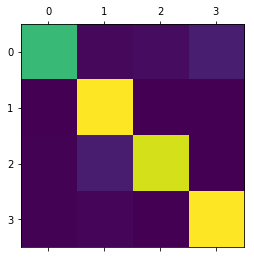

In [181]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()

# Trying classifier on test data

In [184]:
test_data = ['Moving story of a young boy who, left without attention, delves into a life of petty crime', '24 hours in the lives of three young men in the French suburbs the day after a violent riot', 'The early life and career of Vito Corleone in 1920s New York is portrayed while his son, Michael, expands and tightens his grip on the family crime syndicate']

In [185]:
predict = grid_search.predict(test_data)
for review, category in zip(test_data, predict):
    print('%r => %s' % (review, twenty_train.target_names[category]))

'Moving story of a young boy who, left without attention, delves into a life of petty crime' => talk.politics.mideast
'24 hours in the lives of three young men in the French suburbs the day after a violent riot' => talk.politics.mideast
'The early life and career of Vito Corleone in 1920s New York is portrayed while his son, Michael, expands and tightens his grip on the family crime syndicate' => soc.religion.christian
